#### Importing libraries

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns',50)

#### Data Loading & Inspection

In [2]:
movie_path = Path('../data/movies.csv') #movie_path

# Loading movies data
movies = pd.read_csv(movie_path)
movies.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [3]:
print(f'Movies data has {movies.shape[0]} rows and {movies.shape[1]} columns')

Movies data has 4803 rows and 24 columns


In [4]:
movies.dtypes

index             int64
budget            int64
genres           object
homepage         object
id                int64
                 ...   
vote_average    float64
vote_count        int64
cast             object
crew             object
director         object
Length: 24, dtype: object

In [5]:
numerical_data = movies.select_dtypes('number').columns.to_list()
print('Numerical columns :',numerical_data)
print('Number of Numberical columns :',len(numerical_data))

Numerical columns : ['index', 'budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
Number of Numberical columns : 8


In [6]:
non_numeric_data = movies.select_dtypes(exclude = 'number').columns.to_list()
print('Numerical columns :',non_numeric_data)
print('Number of Numberical columns :',len(non_numeric_data))

Numerical columns : ['genres', 'homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'cast', 'crew', 'director']
Number of Numberical columns : 16


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [8]:
# Checking for missing values
missing_values = movies.isnull().sum()
missing_values[missing_values > 0] / movies.shape[0] * 100


genres           0.582969
homepage        64.355611
keywords         8.577972
overview         0.062461
release_date     0.020820
runtime          0.041641
tagline         17.572351
cast             0.895274
director         0.624610
dtype: float64

There are missing values in the dataset, so we need to remove them from the dataset or replace them during the analysis

In [9]:
#changing datatype of the release date
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')


### Descriptive Statistics

In [10]:
# Basic statistics
print("\nFinancial Statistics:")
print(movies[['budget', 'revenue','vote_average','runtime']].describe())

# Calculate key financial metrics
avg_budget = movies['budget'].mean()
avg_revenue = movies['revenue'].mean()
avg_vote_average = movies['vote_average'].mean()
avg_runtime = movies['runtime'].mean()
median_budget = movies['budget'].median()
median_revenue = movies['revenue'].median()
median_vote_average = movies['vote_average'].median()
median_runtime = movies['runtime'].median()

print('\nBudget')
print(f"Average Budget: ${round(avg_budget,2)}")
print(f"Median Budget: ${median_budget}")

print('\nRevenue')
print(f"Average Revenue: ${round(avg_revenue,2)}")
print(f"Median Revenue: ${median_revenue}")

print('\nVote_average')
print(f"Average Vote_average: ${round(avg_vote_average,2)}")
print(f"Median Vote_average: ${median_vote_average}")

print('\nRuntime')
print(f"Average Runtime: ${avg_runtime}")
print(f"Median Runtime: ${median_runtime}")



Financial Statistics:
             budget       revenue  vote_average      runtime
count  4.803000e+03  4.803000e+03   4803.000000  4801.000000
mean   2.904504e+07  8.226064e+07      6.092172   106.875859
std    4.072239e+07  1.628571e+08      1.194612    22.611935
min    0.000000e+00  0.000000e+00      0.000000     0.000000
25%    7.900000e+05  0.000000e+00      5.600000    94.000000
50%    1.500000e+07  1.917000e+07      6.200000   103.000000
75%    4.000000e+07  9.291719e+07      6.800000   118.000000
max    3.800000e+08  2.787965e+09     10.000000   338.000000

Budget
Average Budget: $29045039.88
Median Budget: $15000000.0

Revenue
Average Revenue: $82260638.65
Median Revenue: $19170001.0

Vote_average
Average Vote_average: $6.09
Median Vote_average: $6.2

Runtime
Average Runtime: $106.87585919600083
Median Runtime: $103.0


* The average budget is far from the median signifying a right skewed data, there might be presence of outliers

* The average revenue is also far from the median signifying a right skewed data too, there are many movies that are giving the median values but there are some other movies that bring in so much revenue than others

* The vote_average seems likes its a standard distribution, the median is just around the mean

* The runtime also seems to have a slight right skewness, but it's hard to say for sure without looking at the distribution(a box plot visualization). 

In [11]:
top_grossing = movies.nlargest(10, 'budget')[['title', 'budget']].reset_index(drop=True)
print("Top 10 Highest-Grossing Movies:")
top_grossing


Top 10 Highest-Grossing Movies:


,title,budget
0,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
2,Avengers: Age of Ultron,280000000
3,Superman Returns,270000000
4,John Carter,260000000
5,Tangled,260000000
6,Spider-Man 3,258000000
7,The Lone Ranger,255000000
8,The Dark Knight Rises,250000000
9,Harry Potter and the Half-Blood Prince,250000000


The top 10 highest-grossing movies have very high budgets ranging from 250,000,000 to 380,000,000

In [12]:
corr_matrix = movies[numerical_data].corr()

# Function to color positive correlations green, negative red
def highlight_corr(val):
    color = 'green' if val > 0 else 'red'
    return f'color: {color}'

styled_corr = corr_matrix.style.applymap(highlight_corr)

# Displaying styled DataFrame
display(styled_corr)


C:\Users\DELL\AppData\Local\Temp\ipykernel_19960\3367828911.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_corr = corr_matrix.style.applymap(highlight_corr)


,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.761579,0.190771,-0.414342,-0.522110,-0.319370,-0.120157,-0.442207
budget,-0.761579,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,0.190771,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,-0.414342,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,-0.522110,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,-0.319370,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,-0.120157,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,-0.442207,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


It appears that there are several columns that are correlated with each other in the movies data.

#### Genre & Language Analysis

In [13]:
genre_df = movies['genres'].dropna().str.split(' ').explode().value_counts().reset_index()  
genre_df.columns = ['Genre', 'Count']

# Displaying top 10 genres
print("Top 10 Most Common Genres:\n")
genre_df.head(10)


Top 10 Most Common Genres:



,Genre,Count
0,Drama,2297
1,Comedy,1722
2,Thriller,1259
3,Action,1153
4,Romance,890
5,Adventure,790
6,Crime,696
7,Fiction,530
8,Science,530
9,Horror,519


Drama is the most watched genre type, next most watched is Comedy and Thriller

In [14]:
movies['original_language'].value_counts().nlargest(5)

original_language
en    4505
fr      70
es      32
zh      27
de      27
Name: count, dtype: int64

In [15]:
movies['original_language'].value_counts(normalize=True).nlargest(5)

original_language
en    0.937955
fr    0.014574
es    0.006663
zh    0.005621
de    0.005621
Name: proportion, dtype: float64

More than 93% of the movies are available in English Language(en)

### Visualization

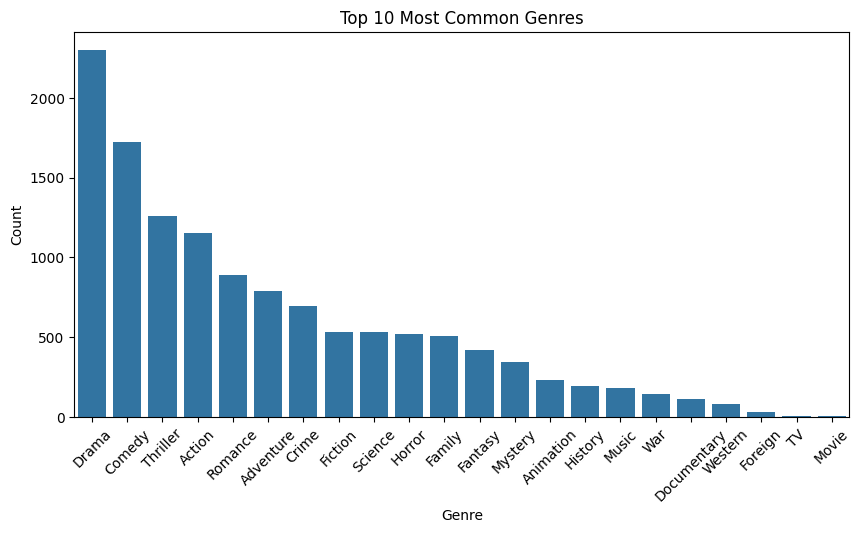

In [16]:
# Bar Chart for Top Genres
plt.figure(figsize=(10,5))
sns.barplot(x=genre_df['Genre'], y=genre_df['Count'])
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


The plot above shows that the most common genres present in the dataset are Drama, Comedy, Thriller and Action. Foreign, TV and Movie are not so popular.

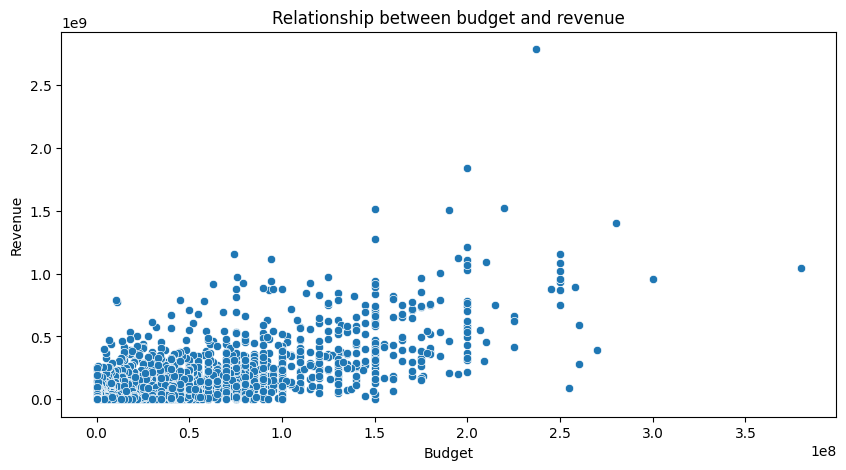

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = movies['budget'], y = movies['revenue'],)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Relationship between budget and revenue')
plt.show()

There appears to be a moderately strong positive correlation between budget and revenue.